## Create a summary of the text below using NLP libraries: nltk and SpaCy

In [18]:
# all imports

import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from string import punctuation
from heapq import nlargest
import matplotlib.pyplot as plt

In [4]:
nlp = spacy.load('en_core_web_sm') # This line loads the English language model 
nltk.download('stopwords') #This line downloads the stopwords corpus from NLTK. Stopwords are common words (like "and", "the", "is", etc.) 
nltk.download('punkt') #downloads the Punkt tokenizer models from NLTK - pre-trained model for tokenizing text into sentences and words.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olgatsyban/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/olgatsyban/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
# text
input_text = "The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) in the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion C in the area of Engineering. Because it has achieved significance within the past fifty years, Criteria Consideration G applies. Under Criterion A, Discovery is significant as the oldest of the three extant orbiter vehicles constructed for the Space Shuttle Program (SSP), the longest running American space program to date; she was the third of five orbiters built by NASA. Unlike the Mercury, Gemini, and Apollo programs, the SSP’s emphasis was on cost effectiveness and reusability, and eventually the construction of a space station. Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters; she was also the first orbiter to fly twenty missions. She had the honor of being chosen as the Return to Flight vehicle after both the Challenger and Columbia accidents. Discovery was the first shuttle to fly with the redesigned SRBs, a result of the Challenger accident, and the first shuttle to fly with the Phase II and Block I SSME. Discovery also carried the Hubble Space Telescope to orbit and performed two of the five servicing missions to the observatory. She flew the first and last dedicated Department of Defense (DoD) missions, as well as the first unclassified defense-related mission. In addition, Discovery was vital to the construction of the International Space Station (ISS); she flew thirteen of the thirty-seven total missions flown to the station by a U.S. Space Shuttle. She was the first orbiter to dock to the ISS, and the first to perform an exchange of a resident crew. Under Criterion C, Discovery is significant as a feat of engineering. According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft.” Although her base structure followed a conventional aircraft design, she used advanced materials that both minimized her weight for cargo-carrying purposes and featured low thermal expansion ratios, which provided a stable base for her Thermal Protection System (TPS) materials. The Space Shuttle orbiter also featured the first reusable TPS; all previous spaceflight vehicles had a single-use, ablative heat shield. Other notable engineering achievements of the orbiter included the first reusable orbital propulsion system, and the first two-fault-tolerant Integrated Avionics System. As Hale stated, the Space Shuttle remains “the largest, fastest, winged hypersonic aircraft in history,” having regularly flown at twenty-five times the speed of sound."


In [8]:
doc = nlp(input_text) # The text is processed using the spaCy pipeline, which tokenizes the text and applies other linguistic annotations.
tokens = [token.text for token in doc]# Extracts the text of each token from the doc object and stores it in a list.

print(tokens)

['The', 'Orbiter', 'Discovery', ',', 'OV-103', ',', 'is', 'considered', 'eligible', 'for', 'listing', 'in', 'the', 'National', 'Register', 'of', 'Historic', 'Places', '(', 'NRHP', ')', 'in', 'the', 'context', 'of', 'the', 'U.S.', 'Space', 'Shuttle', 'Program', '(', '1969', '-', '2011', ')', 'under', 'Criterion', 'A', 'in', 'the', 'areas', 'of', 'Space', 'Exploration', 'and', 'Transportation', 'and', 'under', 'Criterion', 'C', 'in', 'the', 'area', 'of', 'Engineering', '.', 'Because', 'it', 'has', 'achieved', 'significance', 'within', 'the', 'past', 'fifty', 'years', ',', 'Criteria', 'Consideration', 'G', 'applies', '.', 'Under', 'Criterion', 'A', ',', 'Discovery', 'is', 'significant', 'as', 'the', 'oldest', 'of', 'the', 'three', 'extant', 'orbiter', 'vehicles', 'constructed', 'for', 'the', 'Space', 'Shuttle', 'Program', '(', 'SSP', ')', ',', 'the', 'longest', 'running', 'American', 'space', 'program', 'to', 'date', ';', 'she', 'was', 'the', 'third', 'of', 'five', 'orbiters', 'built', 'b

In [9]:
tokens = word_tokenize(input_text) # splits the text into individual words and punctuation marks.
sentences = sent_tokenize(input_text) # splits the text into individual sentences
stop_words = set(stopwords.words('english')) # retrieves the list of common English stop words and converts it to a set for faster lookup
punctuation = punctuation + '\n' # provides a string of all punctuation characters


print("NLTK Tokens:", tokens)
print("NLTK Sentences:", sentences)
print("Stop Words:", stop_words)
print("Punctuation:", punctuation)

NLTK Tokens: ['The', 'Orbiter', 'Discovery', ',', 'OV-103', ',', 'is', 'considered', 'eligible', 'for', 'listing', 'in', 'the', 'National', 'Register', 'of', 'Historic', 'Places', '(', 'NRHP', ')', 'in', 'the', 'context', 'of', 'the', 'U.S.', 'Space', 'Shuttle', 'Program', '(', '1969-2011', ')', 'under', 'Criterion', 'A', 'in', 'the', 'areas', 'of', 'Space', 'Exploration', 'and', 'Transportation', 'and', 'under', 'Criterion', 'C', 'in', 'the', 'area', 'of', 'Engineering', '.', 'Because', 'it', 'has', 'achieved', 'significance', 'within', 'the', 'past', 'fifty', 'years', ',', 'Criteria', 'Consideration', 'G', 'applies', '.', 'Under', 'Criterion', 'A', ',', 'Discovery', 'is', 'significant', 'as', 'the', 'oldest', 'of', 'the', 'three', 'extant', 'orbiter', 'vehicles', 'constructed', 'for', 'the', 'Space', 'Shuttle', 'Program', '(', 'SSP', ')', ',', 'the', 'longest', 'running', 'American', 'space', 'program', 'to', 'date', ';', 'she', 'was', 'the', 'third', 'of', 'five', 'orbiters', 'built

In [11]:
word_frequencies = {}
for word in doc:
  if word.text.lower() not in stop_words:
    if word.text.lower() not in punctuation:
      if word.text not in word_frequencies.keys():
        word_frequencies[word.text] = 1
      else:
        word_frequencies[word.text] += 1

In [12]:
max_frequency = max(word_frequencies.values()) #find the highest frequency value among all the word frequencies.

# Each word's frequency is divided by the maximum frequency to normalize it. As a result, 
#the frequencies are scaled between 0 and 1, 
#where the most frequent word(s) will have a normalized frequency of 1.
for word in word_frequencies:
    word_frequencies[word] = word_frequencies[word] / max_frequency

In [13]:
sentence_tokens = [sent for sent in doc.sents]
#creates a list of sentence tokens by iterating over the sentences in the doc object.
#doc.sents is an iterable of sentence spans in the document.
#Each sentence is extracted and stored in the sentence_tokens list.

In [14]:
# Find sentence scores
sentence_scores = {}
for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies:
            if sent not in sentence_scores:
                sentence_scores[sent] = word_frequencies[word.text.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.text.lower()]

In [20]:
# Get the top 10% of sentences
percentage = 0.1 # 10%
select_length = int(len(sentence_tokens) * percentage)
summary = nlargest(select_length, sentence_scores, key=sentence_scores.get)

# Convert the summary to a string
final_summary = [word.text for word in summary]
summary = ' '.join(final_summary)

print(summary)

Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters; she was also the first orbiter to fly twenty missions.


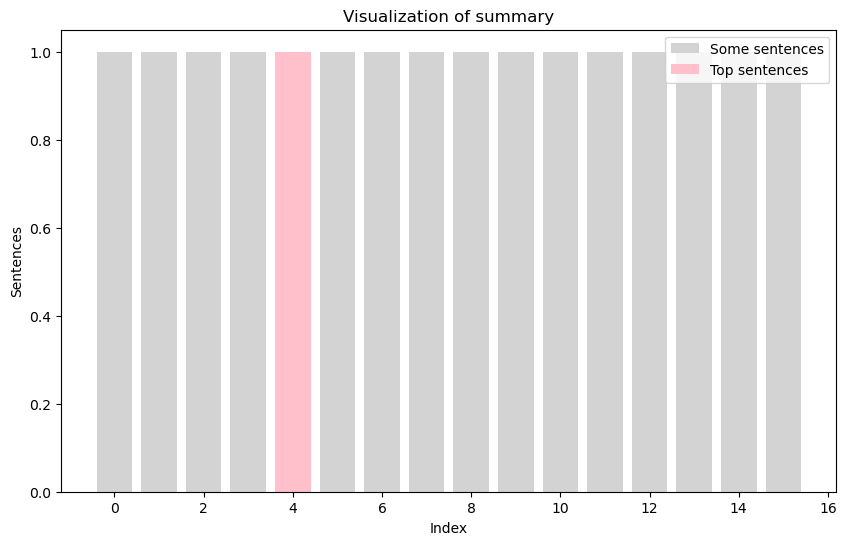

In [23]:
plt.figure(figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Sentences')
plt.title('Visualization of summary')

important_indices = [i for i, sentence in enumerate(sentences) if sentence in summary]
plt.bar(range(len(sentences)), [1] * len(sentences), color='lightgrey', label='Some sentences')
plt.bar(important_indices, [1] * len(important_indices), color='pink', label='Top sentences')
plt.legend()
plt.show()

## Conclusion

In this project, was successfully leveraged the powerful natural language processing libraries spaCy and NLTK to analyze text data. Implemented several key functionalities, including tokenization, word frequency analysis, and sentence scoring for summarization. Here's a summary of our accomplishments:

**1.Text Tokenization:**
spaCy was used to tokenize the text into words and sentences efficiently.
NLTK was utilized to further process the text, specifically downloading and using stopwords to filter out common words.

**2.Word Frequency Analysis:**
A method was developed to compute the frequency of each word in the text, ignoring case and punctuation.
This analysis helped to identify the most common words, providing insights into the text's key themes and topics.

**3.Sentence Scoring and Summarization:**
By calculating the frequency of each word, it was able to score sentences based on the significance of the words they contain.
Then selected the top-scoring sentences to generate a concise summary of the text, effectively capturing the main ideas and important details.

**4.Normalization and Filtering:**
Normalized word frequencies to ensure fair scoring across different sentences.
Filtering out non-essential words and punctuation ensured that our analysis focused on meaningful content.

**Result:**
Throughout this process, it is obviously that pre-processing steps are really important especially such as tokenization and stopword removal in natural language processing tasks. The integration of spaCy and NLTK allowed us to take advantage of the strengths of both libraries, leading to a robust and effective text analysis solution.